<a href="https://colab.research.google.com/github/zharifahkahf/DA-Project-1---Korea/blob/main/korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syizha","key":"430131fdc21f199d232feb3bdc018f22"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d hongsean/korea-income-and-welfare

Dataset URL: https://www.kaggle.com/datasets/hongsean/korea-income-and-welfare
License(s): CC0-1.0
  0% 0.00/772k [00:00<?, ?B/s]
100% 772k/772k [00:00<00:00, 1.18GB/s]


In [ ]:
!unzip korea-income-and-welfare.zip

Archive:  korea-income-and-welfare.zip
  inflating: Korea Income and Welfare.csv  
  inflating: job_code_translated.xlsx  


In [ ]:
import pandas as pd
df = pd.read_csv('Korea Income and Welfare.csv')  # ganti dengan nama file .csv yang muncul
df.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10


In [ ]:
df = pd.read_csv('Korea Income and Welfare.csv')

In [ ]:
df.info() #cek variable type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92857 non-null  int64  
 1   year                92857 non-null  int64  
 2   wave                92857 non-null  int64  
 3   region              92857 non-null  int64  
 4   income              92857 non-null  float64
 5   family_member       92857 non-null  int64  
 6   gender              92857 non-null  int64  
 7   year_born           92857 non-null  int64  
 8   education_level     92857 non-null  int64  
 9   marriage            92857 non-null  int64  
 10  religion            92857 non-null  int64  
 11  occupation          92857 non-null  object 
 12  company_size        92857 non-null  object 
 13  reason_none_worker  92857 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 9.9+ MB


In [ ]:
print(df.shape) #cek dupe data
df.duplicated().sum()

(92857, 14)


np.int64(0)

In [ ]:
df.drop(["occupation", "company_size"], axis=1, inplace=True) #remove variable

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92857 non-null  int64  
 1   year                92857 non-null  int64  
 2   wave                92857 non-null  int64  
 3   region              92857 non-null  int64  
 4   income              92857 non-null  float64
 5   family_member       92857 non-null  int64  
 6   gender              92857 non-null  int64  
 7   year_born           92857 non-null  int64  
 8   education_level     92857 non-null  int64  
 9   marriage            92857 non-null  int64  
 10  religion            92857 non-null  int64  
 11  reason_none_worker  92857 non-null  object 
dtypes: float64(1), int64(10), object(1)
memory usage: 8.5+ MB


In [ ]:
#2014 aja
df_wave14 = df[df['wave'] == 10]
df_wave14.head()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,reason_none_worker
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,10
17,20101,2014,10,1,600.0,1,2,1945,4,2,2,10
31,30101,2014,10,1,1619.0,1,1,1948,3,2,2,
45,40101,2014,10,1,3687.0,2,1,1942,7,3,1,
60,60101,2014,10,1,3486.0,5,1,1962,6,1,1,


In [ ]:
#outliers
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.style.use('bmh'); sns.set()

In [ ]:
#missing value
print(df_wave14.isnull().sum())

id                    0
year                  0
wave                  0
region                0
income                0
family_member         0
gender                0
year_born             0
education_level       0
marriage              0
religion              0
reason_none_worker    0
dtype: int64


In [ ]:
 #statistic
df_wave14.describe()

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion
count,6.914000e+03,6914.0,6914.0,6914.000000,6914.000000,6914.000000,6914.000000,6914.000000,6914.000000,6914.000000,6914.000000
mean,4.871793e+07,2014.0,10.0,3.783627,3697.048294,2.410182,1.317038,1953.427828,4.510558,1.684698,1.505062
std,2.838873e+07,0.0,0.0,2.069259,4916.489925,1.285889,0.465356,15.837708,1.671561,1.069861,0.500011
min,1.010100e+04,2014.0,10.0,1.000000,-27281.000000,1.000000,1.000000,1919.000000,2.000000,1.000000,1.000000
25%,2.475260e+07,2014.0,10.0,2.000000,1180.000000,1.000000,1.000000,1940.000000,3.000000,1.000000,1.000000
50%,4.806510e+07,2014.0,10.0,3.000000,2583.000000,2.000000,1.000000,1952.000000,5.000000,1.000000,2.000000
75%,6.876090e+07,2014.0,10.0,6.000000,5095.750000,3.000000,2.000000,1967.000000,5.000000,2.000000,2.000000
max,9.800070e+07,2014.0,10.0,7.000000,245758.000000,8.000000,2.000000,1996.000000,9.000000,6.000000,2.000000


ada defisit pendapatan. terlihat income minimal ada di -27281

sebaran anggota keluarga

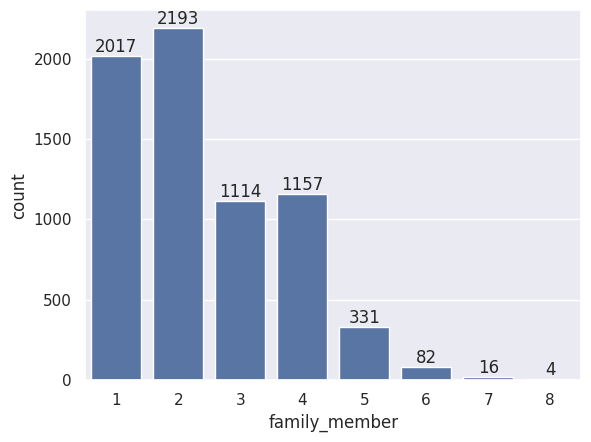

In [ ]:
fm = sns.countplot(x="family_member", data=df_wave14)
fm.bar_label(fm.containers[0])
plt.show()

sebaran education level

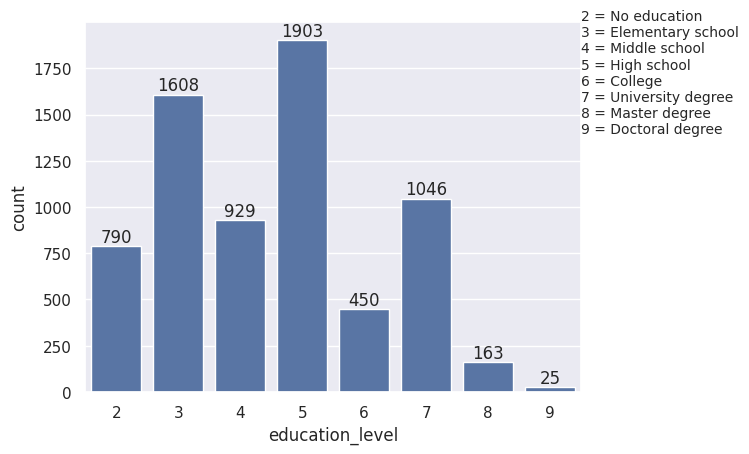

In [ ]:
edl = sns.countplot(x="education_level", data=df_wave14)
edl.bar_label(edl.containers[0])
plt.text(7.5, df_wave14["religion"].value_counts().max() * 0.4,
         "2 = No education\n3 = Elementary school\n4 = Middle school\n5 = High school\n6 = College\n7 = University degree\n8 = Master degree\n9 = Doctoral degree",
         fontsize=10)

plt.show()

sebaran status keluarga

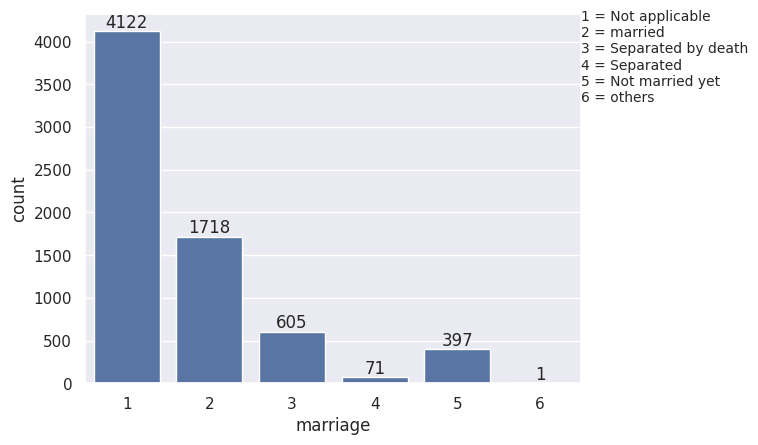

In [ ]:
m = sns.countplot(x="marriage", data=df_wave14)
m.bar_label(m.containers[0])
plt.text(5.5, df_wave14["marriage"].value_counts().max() * 0.8,
         "1 = Not applicable\n2 = married\n3 = Separated by death\n4 = Separated\n5 = Not married yet\n6 = others",
         fontsize=10)

plt.show()

sebaran yang memiliki agama

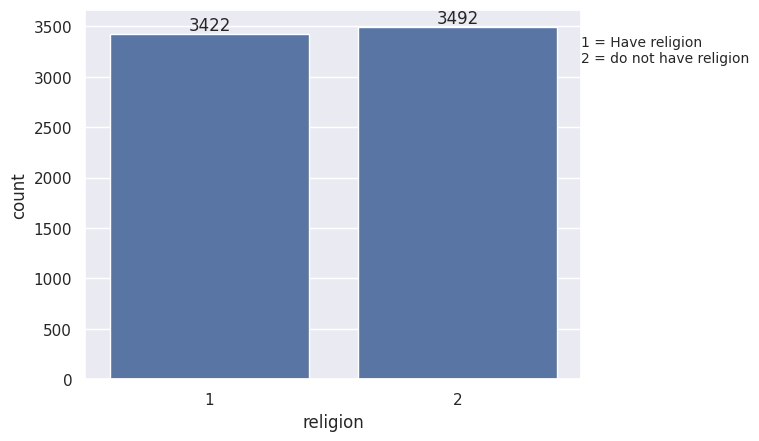

In [ ]:
r = sns.countplot(x="religion", data=df_wave14)
r.bar_label(r.containers[0])
plt.text(1.5, df_wave14["religion"].value_counts().max() * 0.9,
         "1 = Have religion\n2 = do not have religion", fontsize=10)
plt.show()

ANALISIS PERBANDINGAN

In [ ]:
import scipy.stats as stats

In [ ]:
from scipy.stats import mannwhitneyu

group1 = df_wave14[df_wave14['gender'] == 1]['income'].dropna()
group2 = df_wave14[df_wave14['gender'] == 2]['income'].dropna()

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
print(stat, p)

8467217.0 0.0


pvalue<0.05, ada perbedaan signifikan pada income antar male dan female

In [ ]:
print(group1.median(), group2.median())

3794.0 1102.0


income laki-laki cenderung lebih tinggi

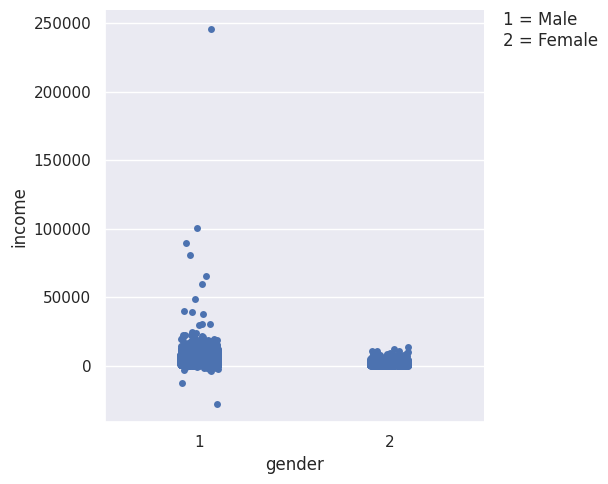

In [ ]:
gen = sns.catplot(x="gender", y="income", data=df_wave14) #visualisasi
plt.text(1.6, df_wave14["income"].max() * 0.95, "1 = Male\n2 = Female")
plt.show()

In [ ]:
from scipy.stats import kruskal

groups = [g['income'].dropna() for _, g in df_wave14.groupby('education_level')]
stat, el = kruskal(*groups)
print(stat, el)

2825.300889976403 0.0


ada perbedaan siginifikan antar minimal 2 education level

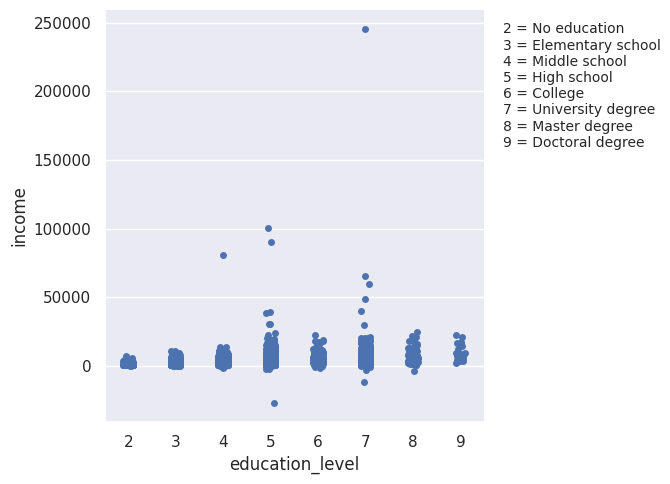

In [ ]:
el = sns.catplot(x="education_level", y="income", data=df_wave14)
plt.text(7.9, df_wave14["income"].max() * 0.65,
         "2 = No education\n3 = Elementary school\n4 = Middle school\n5 = High school\n6 = College\n7 = University degree\n8 = Master degree\n9 = Doctoral degree",
         fontsize=10)

plt.show()

In [ ]:
median_income = (
    df_wave14.groupby('education_level')['income']
    .median()
    .reset_index()
    .sort_values(by='income', ascending=False)
)
print(median_income)

   education_level  income
7                9  6973.0
6                8  6521.0
5                7  5250.0
4                6  4833.0
3                5  3833.0
2                4  2144.0
1                3  1350.0
0                2   831.5


Income berdasarkan region

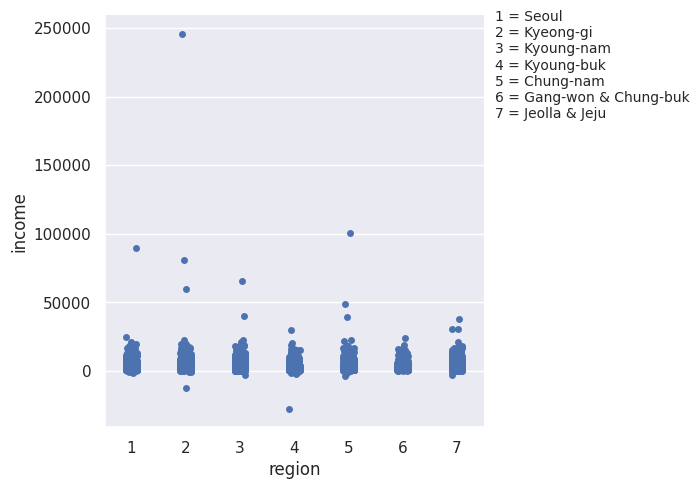

In [ ]:
k = sns.catplot(x="region", y="income", data=df_wave14)
plt.text(6.7, df_wave14["income"].max() * 0.75,
         "1 = Seoul\n2 = Kyeong-gi\n3 = Kyoung-nam\n4 = Kyoung-buk\n5 = Chung-nam\n6 = Gang-won & Chung-buk\n7 = Jeolla & Jeju",
         fontsize=10)

plt.show()

In [ ]:
groups = [g['income'].dropna() for _, g in df.groupby('region')]
stat, reg = kruskal(*groups)
print(stat, reg)


2873.575260218264 0.0


ada perbedaan seiginifikan minimal 2 region

In [ ]:
median_income = (
    df_wave14.groupby('region')['income']
    .median()
    .reset_index()
    .sort_values(by='income', ascending=False)
)
print(median_income)


   region  income
1       2  3359.0
0       1  3335.0
4       5  2804.5
2       3  2438.0
5       6  2129.0
6       7  1928.0
3       4  1896.5


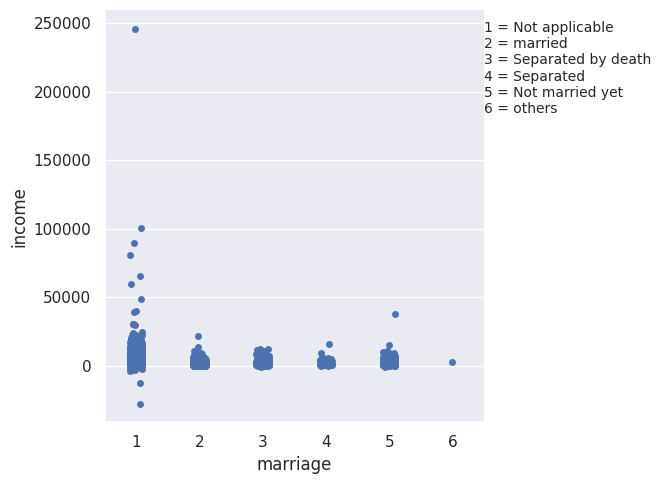

In [ ]:
mar = sns.catplot(x="marriage", y="income", data=df_wave14)
plt.text(5.5, df_wave14["income"].max() * 0.75,
         "1 = Not applicable\n2 = married\n3 = Separated by death\n4 = Separated\n5 = Not married yet\n6 = others",
         fontsize=10)

plt.show()

In [ ]:
groups = [g['income'].dropna() for _, g in df_wave14.groupby('marriage')]
stat, mar = kruskal(*groups)
print(stat, mar)

2323.6643950825232 0.0


ada perbedaan signifikan antar minimal 2 status

In [ ]:
median_income = (
    df_wave14.groupby('marriage')['income']
    .median()
    .reset_index()
    .sort_values(by='income', ascending=False)
)
print(median_income)

   marriage  income
0         1  4103.0
5         6  2816.0
4         5  2523.0
2         3  1919.0
3         4  1849.0
1         2   955.5


ANALISIS KORELASI

In [ ]:
df_wave14[['year_born', 'income']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6914 entries, 4 to 92852
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year_born  6914 non-null   int64  
 1   income     6914 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 162.0 KB


In [ ]:
from scipy.stats import spearmanr

df_wave14['age'] = 2014 - df_wave14['year_born']

In [ ]:
corr, ai = spearmanr(df_wave14['age'], df_wave14['income'])
print("Koefisien Korelasi:", corr)
print("p-value:", ai)

Koefisien Korelasi: -0.6317237427664918
p-value: 0.0


koefisien korelasi < 0, maka terdapat hubungan negatif yang signifikan antara tahun lahir dan income, dimana individu lebih muda cenderung memiliki income lebih tinggi dibandingkan individu yang lebih tua.

In [ ]:
corr, eli = spearmanr(df_wave14['education_level'], df_wave14['income'])
print("Koefisien Korelasi:", corr)
print("p-value:", eli)

Koefisien Korelasi: 0.632627171032351
p-value: 0.0


semakin tinggi pendidikannya, semakin tinggi incomenya

In [91]:
!git clone https://github.com/zharifahkahf/DA-Project-1---Korea.git

Cloning into 'DA-Project-1---Korea'...
